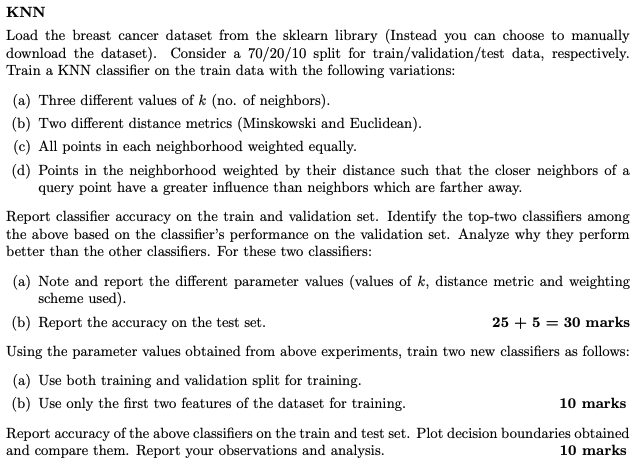

In [1]:
from IPython.display import Image
Image(filename='question3.png')

In [2]:
import pandas as pd
import numpy as np
import operator

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import multilabel_confusion_matrix, plot_confusion_matrix, roc_auc_score

from sklearn.model_selection import cross_val_score

from scipy.stats import zscore

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [3]:
data = load_breast_cancer()

In [4]:
#print(data.DESCR)

In [5]:
#data.keys()

In [6]:
#data["feature_names"]

In [7]:
data_array = data['data']
target_array = data['target']
data_column_name = data['feature_names']
data_target_name = data['target_names']

In [8]:
X = pd.DataFrame(data_array, columns=data_column_name)
Y = pd.Series(target_array)

X = X.apply(zscore)

In [9]:
#X.head()

## Exploring the dataset

In [10]:
#X.shape

In [11]:
#Y.shape

In [12]:
#X.isna().sum()

In [13]:
#Y.value_counts()

In [14]:
#Y.isnull().sum()

In [15]:
#X.dtypes

## Spliting the data into training, test and validation

In [16]:
def split_data_set(X, y):
    
    X_train, X_remianing, y_train, y_remaining = train_test_split(X, y, test_size=0.3, random_state=42)
    X_test, X_val, y_test, y_val = train_test_split(X_remianing, y_remaining, test_size=.33, random_state=42)
    
    return X_train, X_test, X_val, y_train, y_test, y_val

In [17]:
X_train, X_test, X_val, y_train, y_test, y_val = split_data_set(X, Y)

## Training with KNN

In [18]:
def KNN_Classifier(n_neighbors=5, metric='minkowski', weights='uniform', p=2):
    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p, metric=metric)
    
    return clf

In [19]:
def hpyer_combination_generator():
    
    # (a) Three different values of k (no. of neighbors).
    k_values = [3, 5, 13]
    
    #(b) Two different distance metrics (Minskowski and Euclidean).
    distance_values = ["minkowski", "euclidean"]
    
    #(c) All points in each neighborhood weighted equally.
    #(d) Points in the neighborhood weighted by their distance such that the closer 
    #    neighbors of a query point have a greater influence than neighbors which are farther away.
    weight_values = ["uniform", "distance"]

    hyper_prams_combi = []

    for k in k_values:
        for d in distance_values:
            if d == "minkowski":
                p = 3
            else:
                p = 2
            for w in weight_values:
                _ = [k, d, w, p]
                hyper_prams_combi.append(_)
    return hyper_prams_combi

In [20]:
def all_clf(hyper_prams):
    all_clf_dict = {}
    for h_pram in hyper_prams:
        name = f"{h_pram[0]}_{h_pram[1]}_{h_pram[2]}"
        n, m, w, p = h_pram[0], h_pram[1], h_pram[2], h_pram[3]
        all_clf_dict[name] = KNN_Classifier(n_neighbors=n, metric=m, weights=w, p=p)
    
    return all_clf_dict

In [21]:
def clf_fit(clfs, X_train, y_train):
    for clf in clfs.values():
        clf.fit(X_train, y_train)
    
    return clfs

In [22]:
def clf_preditions(data, all_clf_dict):
    clf_pred = {}
    for c in all_clf_dict:
        clf_pred[c] = all_clf_dict[c].predict(data)
    
    return clf_pred

In [23]:
def clf_accuracy_score(y_true, clf_preds):
    clf_accuracy_score = {}
    for c in clf_preds:
        clf_accuracy_score[c] = accuracy_score(clf_preds[c], y_true)
    
    return clf_accuracy_score
        

## PART I

Load the breast cancer dataset from the sklearn library (Instead you can choose to manually download the dataset). Consider a 70/20/10 split for train/validation/test data, respectively. Train a KNN classifier on the train data with the following variations:

- Three different values of k (no. of neighbors).
- Two different distance metrics (Minskowski and Euclidean).
- All points in each neighborhood weighted equally.
- Points in the neighborhood weighted by their distance such that the closer neighbors of a query point have a greater influence than neighbors which are farther away.

### Classifier accuracies on `TEST` data set

In [24]:
hyper_prams = hpyer_combination_generator()
all_clf_dict = all_clf(hyper_prams)
clf_fit(all_clf_dict, X_train, y_train)
clf_preds = clf_preditions(X_test, all_clf_dict)

clf_accuracy_score_for_test_data = clf_accuracy_score(y_test, clf_preds)

### Report classifier accuracy on the `TEST` data set


In [25]:
clf_accuracy_score_for_test_data

{'3_minkowski_uniform': 0.9210526315789473,
 '3_minkowski_distance': 0.9210526315789473,
 '3_euclidean_uniform': 0.9385964912280702,
 '3_euclidean_distance': 0.9385964912280702,
 '5_minkowski_uniform': 0.9385964912280702,
 '5_minkowski_distance': 0.9385964912280702,
 '5_euclidean_uniform': 0.9385964912280702,
 '5_euclidean_distance': 0.9385964912280702,
 '13_minkowski_uniform': 0.956140350877193,
 '13_minkowski_distance': 0.956140350877193,
 '13_euclidean_uniform': 0.9473684210526315,
 '13_euclidean_distance': 0.9473684210526315}

### Classifier accuracies on `VALIDATION` data set

In [26]:
hyper_prams = hpyer_combination_generator()
all_clf_dict = all_clf(hyper_prams)
clf_fit(all_clf_dict, X_train, y_train)
clf_preds = clf_preditions(X_val, all_clf_dict)

clf_accuracy_score_for_val_data = clf_accuracy_score(y_val, clf_preds)

### Report classifier accuracy on the `VALIDATION` data set

In [27]:
clf_accuracy_score_for_val_data

{'3_minkowski_uniform': 1.0,
 '3_minkowski_distance': 1.0,
 '3_euclidean_uniform': 1.0,
 '3_euclidean_distance': 1.0,
 '5_minkowski_uniform': 1.0,
 '5_minkowski_distance': 1.0,
 '5_euclidean_uniform': 1.0,
 '5_euclidean_distance': 1.0,
 '13_minkowski_uniform': 0.9824561403508771,
 '13_minkowski_distance': 0.9824561403508771,
 '13_euclidean_uniform': 0.9824561403508771,
 '13_euclidean_distance': 0.9824561403508771}

### Classifier accuracies on `TRAIN` data set

In [28]:
hyper_prams = hpyer_combination_generator()
all_clf_dict = all_clf(hyper_prams)
clf_fit(all_clf_dict, X_train, y_train)
clf_preds = clf_preditions(X_train, all_clf_dict)

clf_accuracy_score_for_train_data = clf_accuracy_score(y_train, clf_preds)

### Report classifier accuracy on the `TRAIN` data set

In [29]:
clf_accuracy_score_for_train_data

{'3_minkowski_uniform': 0.9824120603015075,
 '3_minkowski_distance': 1.0,
 '3_euclidean_uniform': 0.9849246231155779,
 '3_euclidean_distance': 1.0,
 '5_minkowski_uniform': 0.9748743718592965,
 '5_minkowski_distance': 1.0,
 '5_euclidean_uniform': 0.9773869346733668,
 '5_euclidean_distance': 1.0,
 '13_minkowski_uniform': 0.9698492462311558,
 '13_minkowski_distance': 1.0,
 '13_euclidean_uniform': 0.9673366834170855,
 '13_euclidean_distance': 1.0}

## PART II

Report classifier accuracy on the train and validation set. Identify the top-two classifiers among the above based on the classifier’s performance on the validation set. Analyze why they perform better than the other classifiers. For these two classifiers:
- Note and report the different parameter values (values of k, distance metric and weighting scheme used).
- Report the accuracy on the test set.

### Model Evaluation (`TRAIN` and `VALIDATION` set)

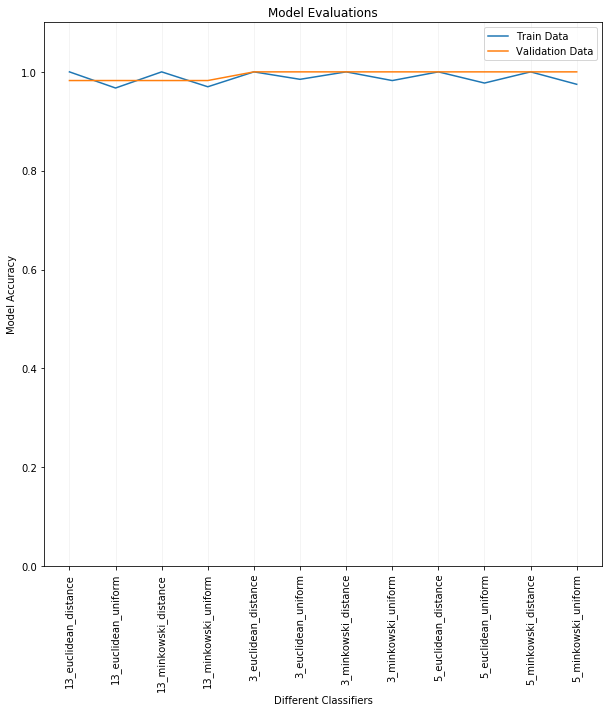

In [30]:
plt.figure(figsize=(10,10))
plt.plot(*zip(*sorted(clf_accuracy_score_for_train_data.items())), label="Train Data")
plt.plot(*zip(*sorted(clf_accuracy_score_for_val_data.items())), label="Validation Data")
plt.xlabel('Different Classifiers')
plt.ylabel('Model Accuracy')
plt.title('Model Evaluations')
plt.ylim(0, 1.1)
plt.grid(axis='x', color='0.95')
plt.legend()
plt.xticks(rotation=90)

plt.show()

### Identify the top-two classifiers on the `VALIDATION` set.

In [31]:
clf_accuracy_score_for_val_data_sorted = dict(sorted(clf_accuracy_score_for_val_data.items(), \
                                                     key=operator.itemgetter(1), reverse=True))

In [32]:
clf_accuracy_score_for_val_data_sorted

{'3_minkowski_uniform': 1.0,
 '3_minkowski_distance': 1.0,
 '3_euclidean_uniform': 1.0,
 '3_euclidean_distance': 1.0,
 '5_minkowski_uniform': 1.0,
 '5_minkowski_distance': 1.0,
 '5_euclidean_uniform': 1.0,
 '5_euclidean_distance': 1.0,
 '13_minkowski_uniform': 0.9824561403508771,
 '13_minkowski_distance': 0.9824561403508771,
 '13_euclidean_uniform': 0.9824561403508771,
 '13_euclidean_distance': 0.9824561403508771}

### Why they perform better than the other classifiers ?

What we see is with K=13, we see more accuracy, one of the reason might be with higher value of K, we expect less chance of error, as it suppresses the effects of noise, although it makes the classification boundaries less distinct. 

### Report the accuracy on the `TEST` set

In [33]:
clf_accuracy_score_for_test_data_sorted = dict(sorted(clf_accuracy_score_for_test_data.items(), \
                                                     key=operator.itemgetter(1), reverse=True))

In [34]:
clf_accuracy_score_for_test_data_sorted

{'13_minkowski_uniform': 0.956140350877193,
 '13_minkowski_distance': 0.956140350877193,
 '13_euclidean_uniform': 0.9473684210526315,
 '13_euclidean_distance': 0.9473684210526315,
 '3_euclidean_uniform': 0.9385964912280702,
 '3_euclidean_distance': 0.9385964912280702,
 '5_minkowski_uniform': 0.9385964912280702,
 '5_minkowski_distance': 0.9385964912280702,
 '5_euclidean_uniform': 0.9385964912280702,
 '5_euclidean_distance': 0.9385964912280702,
 '3_minkowski_uniform': 0.9210526315789473,
 '3_minkowski_distance': 0.9210526315789473}

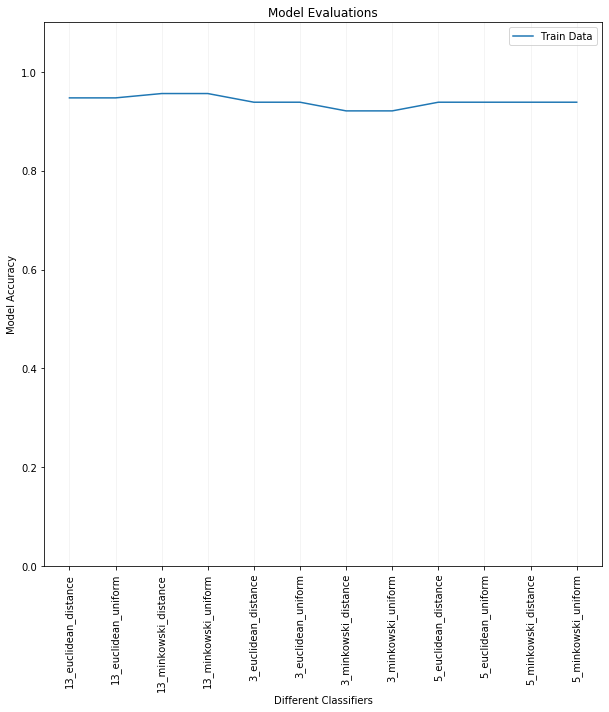

In [35]:
plt.figure(figsize=(10,10))
plt.plot(*zip(*sorted(clf_accuracy_score_for_test_data_sorted.items())), label="Train Data")
plt.xlabel('Different Classifiers')
plt.ylabel('Model Accuracy')
plt.title('Model Evaluations')
plt.ylim(0, 1.1)
plt.grid(axis='x', color='0.95')
plt.legend()
plt.xticks(rotation=90)

plt.show()

## PART III

Using the parameter values obtained from above experiments, train two new classifiers as follows:

- Use both training and validation split for training.
- Use only the first two features of the dataset for training.

### Use both training and validation split for training.

In [36]:
X_train_new = pd.concat([X_train, X_val], axis=0, sort=False)
y_train_new = pd.concat([y_train, y_val], axis=0, sort=False)

In [37]:
#X_train

In [38]:
#X_val

In [39]:
#X_train_new

In [40]:
#X_train_new

### Use only the first two features of the dataset for training

In [41]:
X_train_with_two_feature = X_train_new[X_train_new.columns[:2]]
X_test_with_two_feature = X_test[X_test.columns[:2]]

In [42]:
#X_test_with_two_feature

In [43]:
#X_train_with_two_feature

In [44]:
#y_train_new

### Best two classifiers

- n_neighbors=13, metric="minkowski", weights="uniform", p=3
- n_neighbors=13, metric="minkowski", weights="distance", p=3

In [45]:
best_clf_1 = KNN_Classifier(n_neighbors=13, metric="minkowski", weights="uniform", p=3)
best_clf_2 = KNN_Classifier(n_neighbors=13, metric="minkowski", weights="distance", p=3)

In [46]:
best_clf_1.fit(X_train_with_two_feature, y_train_new)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=3,
                     weights='uniform')

In [47]:
best_clf_2.fit(X_train_with_two_feature, y_train_new)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=3,
                     weights='distance')

In [48]:
clf_pred_best_clf_1_on_training = best_clf_1.predict(X_test_with_two_feature)

In [49]:
clf_pred_best_clf_2_on_training = best_clf_2.predict(X_test_with_two_feature)

### Accuracy of these two best classifiers 

In [50]:
print(f" Accuracy of best classifier 1 : {accuracy_score(clf_pred_best_clf_1_on_training, y_test)}")
print(f" Accuracy of best classifier 2 : {accuracy_score(clf_pred_best_clf_2_on_training, y_test)}")

 Accuracy of best classifier 1 : 0.9035087719298246
 Accuracy of best classifier 2 : 0.8859649122807017


In [51]:
#X_train_with_two_feature.shape

In [52]:
#X_test_with_two_feature.shape

In [53]:
#y_train_new.shape

In [54]:
#y_test.shape

### Plot decision boundaries obtained and compare them.

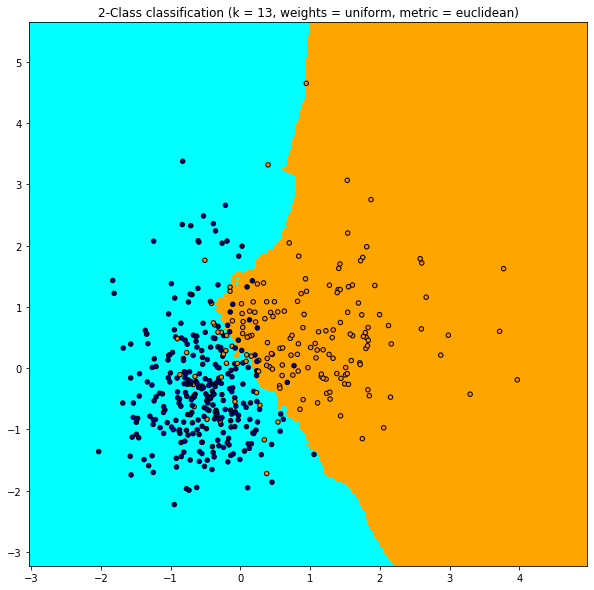

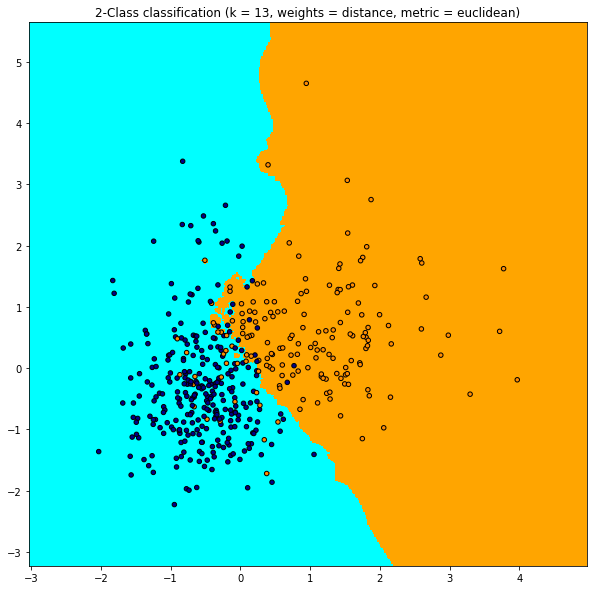

In [55]:
# Converting the df to numpy array 
X = X_train_with_two_feature.to_numpy()
y = y_train_new.to_numpy()
n_neighbors = 13
metric="euclidean" 

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNN_Classifier(n_neighbors=n_neighbors, metric=metric, weights=weights, p=3)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"2-Class classification (k = {n_neighbors}, weights = {weights}, metric = {metric})")

plt.show()